### **Discretization or Binning**
> Discretization is the process of converting continuous variables into discrete variables by creating a set of contiguous intervals that span the range of the variable's values. Discretization is also called binning, where bin is an alternate name for ineterval.

* To handle outliers 
* To improve the value spread

### **Binning**
> * **Supervised**
>> * Equal width (uniform) binning
>> * Equal frequency (quantile) binning
>> * K Means binning
* **Unsupervised**
>> * Decision Tree binning
* **Custom binning**

### **Equal width binning**
* Size of bin is given by (max-min)/bins
* Handles outliers
* Spread of data does not change

### **Equal frequency/quantile binning**
* Divides the data into bins containing equal amount of data in each of them
* If the number of bins is 10, then 10 bins will be created, each containing 10% of data
* Outliers are handled and the spread of the data becomes uniform in each histogram

### **K Means binning**
* Use of K Means clustering algorithm to seperate the data into clusters
* Each cluster is considered a bin or an interval 

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [51]:
df = pd.read_csv('titanic/train.csv',usecols = ['Age','Fare','Survived'])

In [52]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(891, 3)
(714, 3)


In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.25)

In [54]:
clf = DecisionTreeClassifier()

In [55]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier()

#### **Accuracy score and cross val score without discretization**

In [56]:
y_pred = clf.predict(X_test)
print("Accuracy score : ",accuracy_score(Y_test,y_pred))
X = df.drop('Survived',axis=1)
Y = df['Survived']
print("Cross validation score : ",np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy')))

Accuracy score :  0.6424581005586593
Cross validation score :  0.6358959311424099


#### **Discretization of 'Age' column using KBinsDiscretizer**

In [57]:
from sklearn.preprocessing import KBinsDiscretizer

In [58]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [59]:
trf = ColumnTransformer(transformers = [
                                        ('tnf1',kbin_age,[0]),
                                        ('tnf2',kbin_fare,[1])
])

In [60]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [61]:
trf.named_transformers_['tnf1'].bin_edges_

array([array([ 0.67,  6.6 , 16.  , 18.  , 21.  , 23.  , 25.  , 27.  , 29.  ,
              31.  , 34.  , 36.8 , 41.  , 46.8 , 53.4 , 80.  ])             ],
      dtype=object)

In [62]:
trf.named_transformers_['tnf2'].bin_edges_

array([array([  0.     ,   7.25   ,   7.81084,   7.925  ,   8.09332,   9.825  ,
               12.425  ,  13.     ,  16.1    ,  25.9292 ,  27.     ,  31.3425 ,
               47.58   ,  70.66   , 106.425  , 512.3292 ])                     ],
      dtype=object)

In [63]:
clf_trf = DecisionTreeClassifier()
clf_trf.fit(X_train_trf,Y_train)
preds = clf_trf.predict(X_test_trf)
print("New Accuracy Score : ",accuracy_score(Y_test,preds))
X_trf = trf.transform(X)
print("New cross validation score : ",np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,Y,cv=10,scoring='accuracy')))

New Accuracy Score :  0.6033519553072626
New cross validation score :  0.6821791862284821


**The accuracy and cross val score increases here on discretization**

### **Custom function for discretization based on given strategy and visualization**

In [64]:
def discretize(n_bins,strategy):
  kbin_age = KBinsDiscretizer(n_bins=n_bins,encode='ordinal',strategy=strategy)
  kbin_fare = KBinsDiscretizer(n_bins=n_bins,encode='ordinal',strategy=strategy)

  trf = ColumnTransformer(transformers = [
                                        ('tnf1',kbin_age,[0]),
                                        ('tnf2',kbin_fare,[1])
  ])

  X_trf = trf.fit_transform(X)
  print("cross validation score : ",np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,Y,cv=10,scoring='accuracy')))
  print()
  
  plt.figure(figsize=(14,4))

  plt.subplot(121)
  plt.hist(X['Age'])
  plt.title('Before')

  plt.subplot(122)
  plt.hist(X_trf[:,0],color='red')
  plt.title('After')

  plt.show()

  plt.figure(figsize=(14,4))

  plt.subplot(121)
  plt.hist(X['Fare'])
  plt.title('Before')

  plt.subplot(122)
  plt.hist(X_trf[:,1],color='red')
  plt.title('After')

  plt.show()

cross validation score :  0.682140062597809



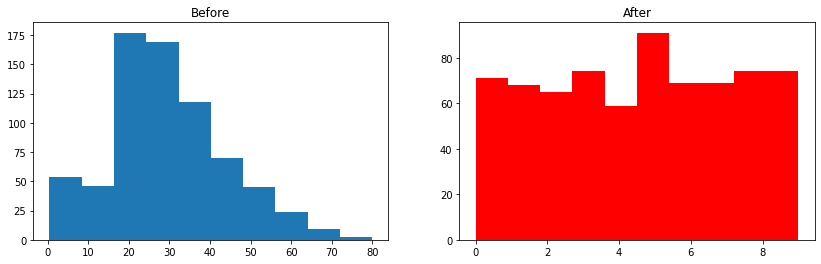

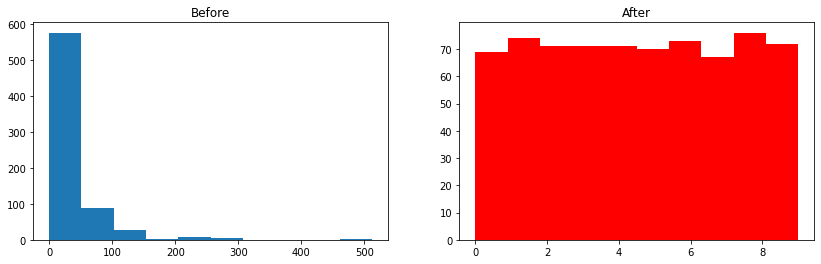

In [65]:
discretize(10,'quantile')

cross validation score :  0.6864632237871675



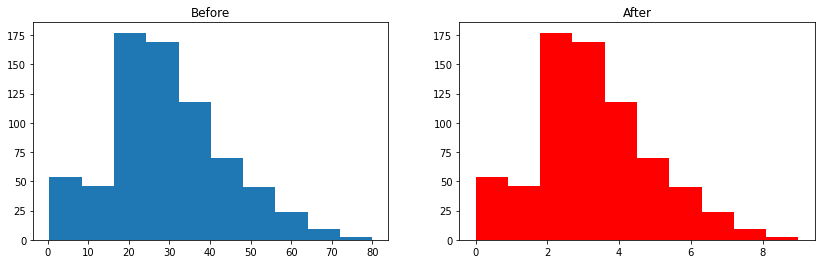

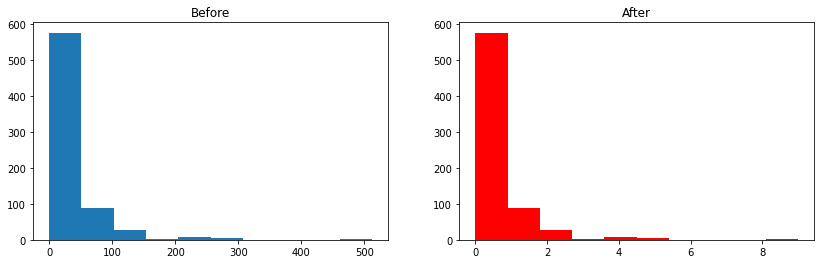

In [66]:
discretize(10,'uniform')

cross validation score :  0.6654147104851329



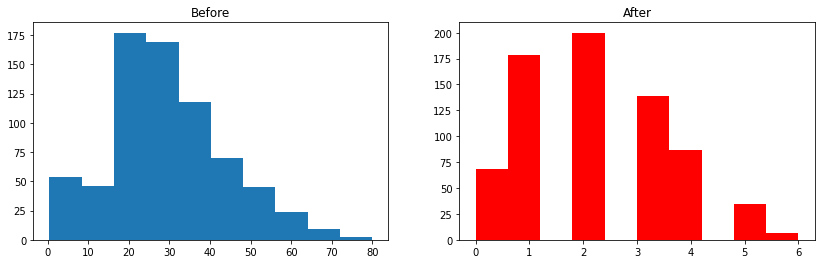

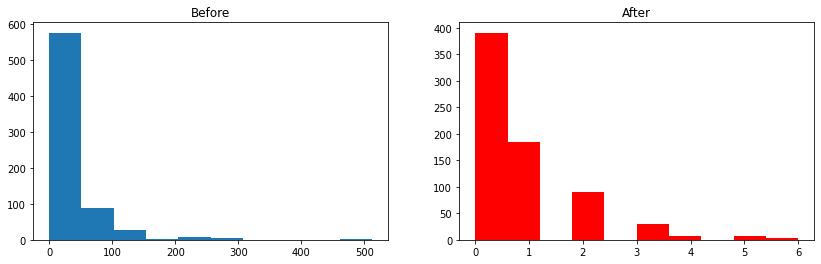

In [67]:
discretize(7,'kmeans')

## **Binarization**
* **We convert each numerical value into binary data based on whether the value falls above or below a certain threshold**
* **Use scikit-learn's Binarizer**

In [68]:
dataset = pd.read_csv('titanic/train.csv',usecols = ['Age','Fare','SibSp','Parch','Survived'])

In [69]:
dataset.dropna(inplace=True)

In [70]:
dataset.head(3)

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250


In [71]:
X = dataset.drop('Survived',axis=1)
Y = dataset['Survived']
print("Cross validation score : ",np.mean(cross_val_score(DecisionTreeClassifier(),X,Y,cv=10,scoring='accuracy')))

Cross validation score :  0.6387519561815337


#### **Use the Sibling - Spouse and parent - child columns to create a family or no family binary column**

In [72]:
dataset['Family'] = dataset['SibSp']+dataset['Parch']

In [73]:
dataset.drop(columns=['SibSp','Parch'],inplace=True)

In [74]:
from sklearn.preprocessing import Binarizer

In [75]:
trf = ColumnTransformer(transformers=[
                                      ('bin',Binarizer(copy=False),['Family'])
],remainder='passthrough')

In [76]:
X = dataset.drop('Survived',axis=1)
Y = dataset['Survived']
X_trf = trf.fit_transform(X)

In [77]:
print("Cross validation score : ",np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,Y,cv=10,scoring='accuracy')))

Cross validation score :  0.6303794992175273


In [78]:
X_trf

array([[ 1.    , 22.    ,  7.25  ],
       [ 1.    , 38.    , 71.2833],
       [ 0.    , 26.    ,  7.925 ],
       ...,
       [ 0.    , 19.    , 30.    ],
       [ 0.    , 26.    , 30.    ],
       [ 0.    , 32.    ,  7.75  ]])

In [79]:
X

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0
...,...,...,...
885,39.0,29.1250,5
886,27.0,13.0000,0
887,19.0,30.0000,0
889,26.0,30.0000,0
